# Objectives of this Lab
- familiarize yourself with `sklearn`
- train some simple models

## Reminders
- activate your hsi25_ml-ssc_25.0 conda env (kernel)

# scikit-learn
- has (almost) everything you'll need to handle small-to-medium sized datasets
- helps you go from data you collected to training and evaluating many different kinds of machine learning models
- the [the user guide](https://scikit-learn.org/stable/user_guide.html) also has excellent documentation and some fundamental explanations

# Let's load some simple thermochemical data
- I've collected thermochemical data for aluminum oxide (Al2O3) in the alpha (corundum) crystal structure
- This data was inferred from calorimetry experiments and is reported in the [NIST JANAF Thermochemical Tables](https://janaf.nist.gov/)


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.style.use('../files/plot_style.mplstyle')
marker_size=5

current_dir = os.getcwd()
data_dir = os.path.join(current_dir, '..', 'data')
data_file = os.path.join(data_dir, 'Al2O3.csv')

In [4]:
!head ../data/Al2O3.csv

cmpd,T,G,H,S
Al2O3,300,-0.031603669,0.000303881,0.0001063585
Al2O3,400,-0.044907706,0.018626108,0.00015883453499999998
Al2O3,500,-0.063176038,0.039604084,0.000205560242
Al2O3,600,-0.085837177,0.062257968,0.00024682524
Al2O3,700,-0.112387832,0.086057936,0.0002834939557142857
Al2O3,800,-0.142410116,0.110690988,0.00031637638000000005
Al2O3,900,-0.175559102,0.135959372,0.00034613163777777776
Al2O3,1000,-0.211549567,0.161729803,0.00037327937
Al2O3,1100,-0.25014168,0.18790838,0.0003982273272727273


In [5]:
df = pd.read_csv(data_file)
df.head()

,cmpd,T,G,H,S
0,Al2O3,300,-0.031604,0.000304,0.000106
1,Al2O3,400,-0.044908,0.018626,0.000159
2,Al2O3,500,-0.063176,0.039604,0.000206
3,Al2O3,600,-0.085837,0.062258,0.000247
4,Al2O3,700,-0.112388,0.086058,0.000283


# Let's shift our units from eV to meV just to make them nicer to plot

In [6]:
for col in ['G', 'H', 'S']:
    df[col] = df[col] * 1000

In [7]:
df.head()

,cmpd,T,G,H,S
0,Al2O3,300,-31.603669,0.303881,0.106358
1,Al2O3,400,-44.907706,18.626108,0.158835
2,Al2O3,500,-63.176038,39.604084,0.205560
3,Al2O3,600,-85.837177,62.257968,0.246825
4,Al2O3,700,-112.387832,86.057936,0.283494


/Users/cbartel/bin/anaconda3/envs/hsi25_ml-ssc_25.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


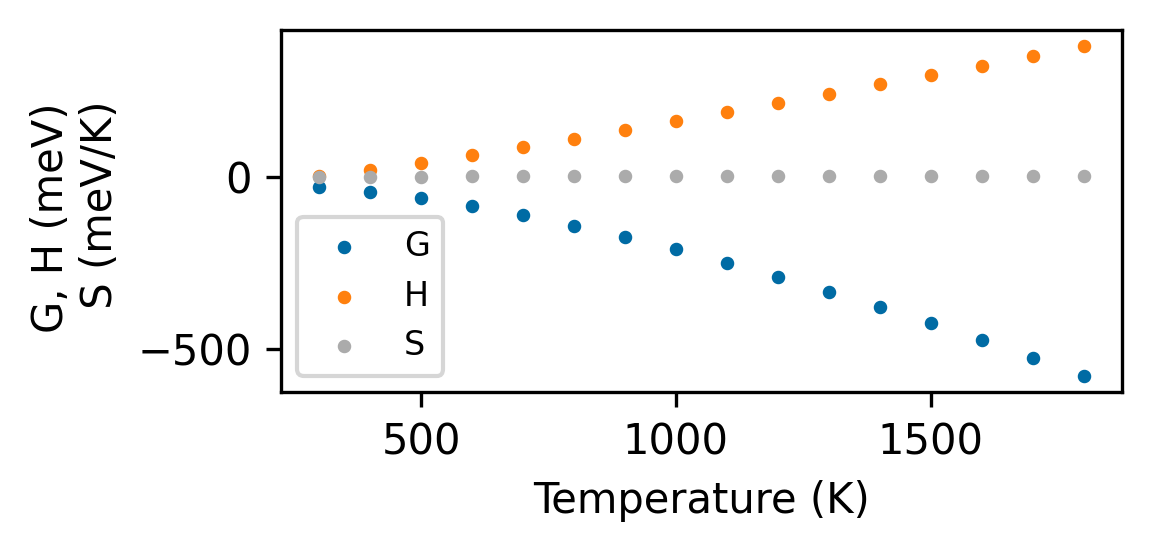

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
#props = list(df)
for prop in ['G', 'H', 'S']:
    ax = plt.scatter(df['T'].values, df[prop].values, label=prop, s=marker_size)

ax = plt.xlabel('Temperature (K)')
ax = plt.ylabel('G, H (meV) \n S (meV/K)')
ax = plt.legend(ncol=1)

# Recall our general supervised learning problem:
\begin{align}
y = f(X)
\end{align}
- y is what we're trying to predict (e.g., some property)
- X is our matrix of features (the basis on which we want to make predictions)
- f is the model we learn (the mapping from X to y)

# Let's "learn" how G depends on these properties

In [9]:
features = ['T']
target = 'G'

X = df[features].values
y = df[target].values

print(X.shape)
print(y.shape)

#X = X.reshape(-1, 1)
#X.shape

(16, 1)
(16,)


# First thing we should do -- reserve some data for testing!

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [13]:
print(X_train.shape)
print(y_train.shape)

(12, 1)
(12,)


In [14]:
print(X_test.shape)
print(y_test.shape)

(4, 1)
(4,)


# Let's fit a linear model with one feature (temperature)
- we're pursuing models of the form: `G(T) = w0 + w1*T`

First, we'll import the model we want to use (linear regression, in this case)

In [15]:
from sklearn.linear_model import LinearRegression

Now, initialize the model
- note: when we get to more complex models, there are often several arguments (hyperparameters) that you can choose upon initialization

In [16]:
model = LinearRegression()

In [17]:
help(model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

# sklearn models are `class`es with two essential methods
- `model.fit` --> fit my model to my training data
- `model.predict` --> make predictions with my fit (trained) model on any data of interest

In [18]:
model.fit(X_train, y_train)

LinearRegression()

Now our model is fit to the training data, so it can be used to make predictions

In [19]:
y_pred = model.predict(X_train)
print(y_pred)

[-470.0394941  -359.01963976  -62.96669486 -247.99978542 -433.03287599
 -544.05273033   11.04654136 -507.04611221 -396.02625788  -25.96007675
  -99.97331297 -136.97993109]


Lets plot to see how we did on the training set

/Users/cbartel/bin/anaconda3/envs/hsi25_ml-ssc_25.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


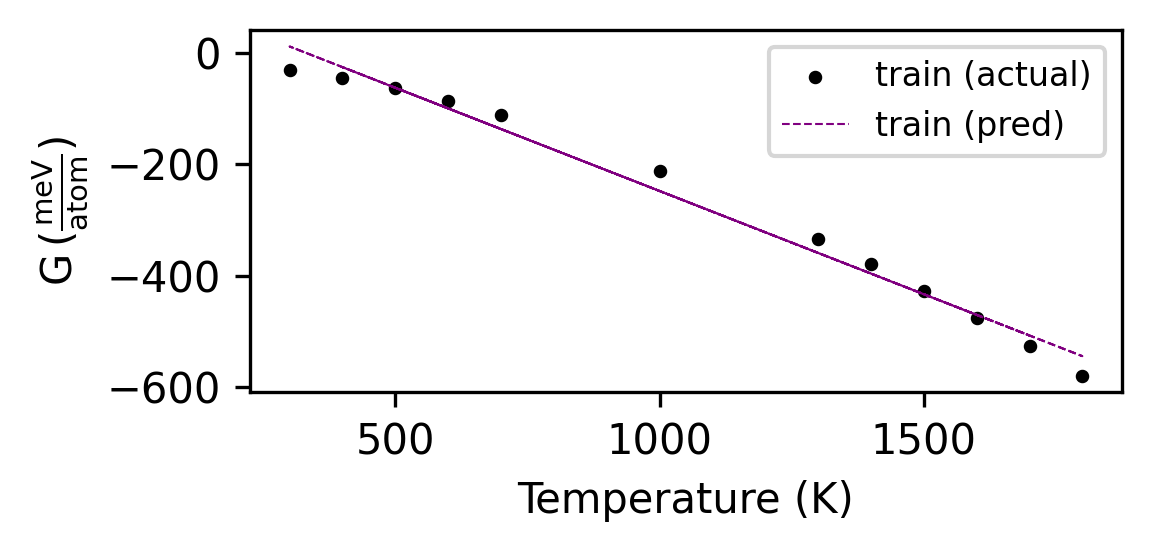

In [20]:
fig = plt.figure()
ax = plt.subplot(111)
ax = plt.scatter(X_train, y_train, s=marker_size, color='black', label='train (actual)')
ax = plt.plot(X_train, y_pred, color='purple', ls='--', lw=0.5, label='train (pred)')
ax = plt.xlabel('Temperature (K)')
ax = plt.ylabel(r'$G\/(\frac{meV}{atom})$')
ax = plt.legend()

There are also many "scoring" metrics we might consider

In [21]:
def mean_error(y_actual, y_pred):
    return np.mean([y_actual[i] - y_pred[i] for i in range(len(y_actual))])

def mean_absolute_error(y_actual, y_pred):
    return np.mean([abs(y_actual[i] - y_pred[i]) for i in range(len(y_actual))])

def root_mean_square_error(y_actual, y_pred):
    return (np.mean([(y_actual[i] - y_pred[i])**2 for i in range(len(y_actual))]))**0.5

In [22]:
mean_error(y_train, y_pred)

-8.348877145181177e-14

In [23]:
mean_absolute_error(y_train, y_pred)

20.40101851876265

In [24]:
root_mean_square_error(y_train, y_pred)

23.93878108002388

Each error metric tells you different things:
- mean error tells you whether your model is making systematic errors or not (ours clearly isn't)
- mean absolute error (MAE) tells you the average absolute difference between your prediction and the target
- root mean square error is similar to MAE but the penalty for egregious errors is larger

See [`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) for many options

We can also look at the functional form of our learned model with `coef_` and `intercept_`

In [25]:
print('our model is G(T) =  %.2f * T + %.2f ' % (model.coef_, model.intercept_))

our model is G(T) =  -0.37 * T + 122.07 



# Let's make our model better by also including squared temperature dependence

In [26]:
df['T^2'] = df['T']**2

In [27]:
df.head()


,cmpd,T,G,H,S,T^2
0,Al2O3,300,-31.603669,0.303881,0.106358,90000
1,Al2O3,400,-44.907706,18.626108,0.158835,160000
2,Al2O3,500,-63.176038,39.604084,0.205560,250000
3,Al2O3,600,-85.837177,62.257968,0.246825,360000
4,Al2O3,700,-112.387832,86.057936,0.283494,490000


In [28]:
features = ['T', 'T^2']
target = ['G']

X = df[features].values
y = df[target].values

In [29]:
X.shape

(16, 2)

In [30]:
y.shape

(16, 1)

In [31]:
print(X[0, :])
print(X[1, :])

[  300 90000]
[   400 160000]


Let's re-split our data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

And train a new model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_train)

In [35]:
print(X_train[:,0])

[1600 1300  500 1000 1500 1800  300 1700 1400  400  600  700]


/Users/cbartel/bin/anaconda3/envs/hsi25_ml-ssc_25.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


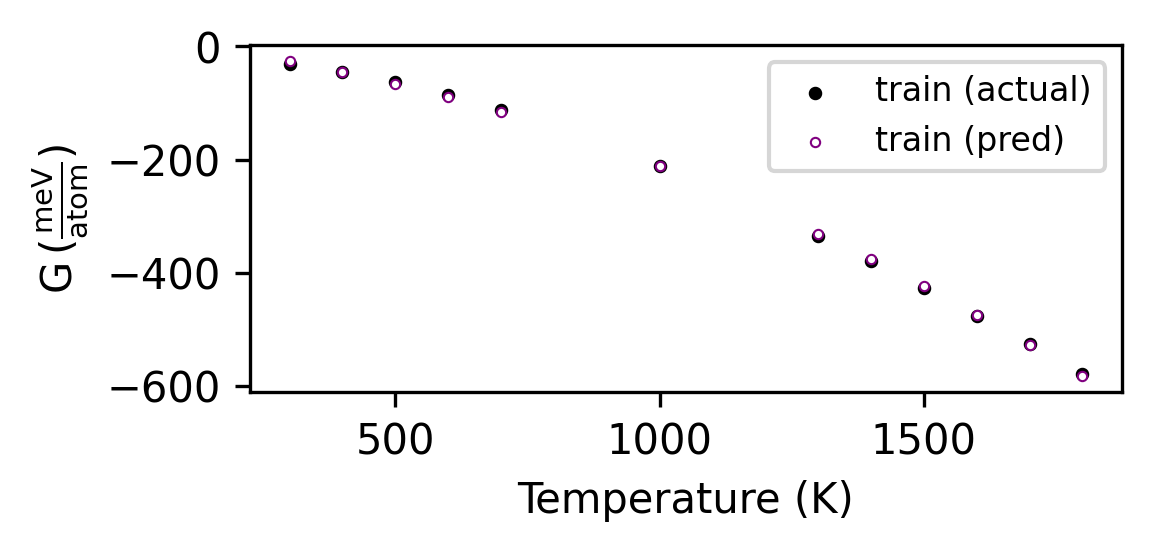

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
ax = plt.scatter(X_train[:,0], y_train, s=marker_size, color='black', label='train (actual)')
ax = plt.scatter(X_train[:,0], y_pred, s=marker_size, color='purple', lw=0.5, facecolor='white', label='train (pred)')
ax = plt.xlabel('Temperature (K)')
ax = plt.ylabel(r'$G\/(\frac{meV}{atom})$')
ax = plt.legend()

In [37]:
mean_absolute_error(y_train, y_pred)

2.687868723453434

In [38]:
print('our model is G(T) =  %.4f * T + %.4f * T^2 + %.2f ' % (model.coef_[0][0], model.coef_[0][1], model.intercept_))

our model is G(T) =  -0.0939 * T + -0.0001 * T^2 + 14.18 


# We're doing the same things over and over.. how about some functions?

In [39]:
def get_Xy(df, features, target):
    """
    Args:
        df (Pandas DataFrame) - our tabular data
        features (list) - list of strings that correspond with columns in our df
        target (str) - name of column in our df with target property

    Returns:
        X, y 
            where X is our feature matrix, which is an array with X.shape = (len(df), len(features)
            and y is our target array, which is an array with y.shape = (len(df), )
    """
    X = df[features].values
    y = df[target].values
    return X, y

def do_train_test_split(X, y, test_size=0.25, random_state=44):
    """
    Args:
        X (np.ndarray): feature matrix, which is an array with X.shape = (len(df), len(features)
        y (np.ndarray): target array, which is an array with y.shape = (len(df), ) 
        test_size (float): the fraction of our data we want to reserve for testing
        random_state (int): a random state variable to make our split deterministic
    Returns:
        X_train, X_test, y_train, y_test
            feature matrices (np.ndarray) for training and testing
            target arrays (np.ndarray) for training and testing
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def fit_model(model, X_train, y_train):
    """
    Args:
        model (sklearn model): some model in sklearn
        X_train (np.ndarray): training feature matrix
        y_train (np.ndarray): training target vector

    Returns:
        sklearn model fit to (X_train, y_train)
    """
    model.fit(X_train, y_train)
    return model

def make_predictions(fit_model, X):
    """
    Args:
        fit_model (sklearn model): some model in sklearn that has been fit
        X (np.ndarray): some feature matrix that you want to make predictions on
    Returns:
        array of predictions given the feature matrix, X
    """
    return fit_model.predict(X)

def score(y_actual, y_pred):
    """
    Args:
        y_actual (np.ndarray): the actual values of the target
        y_pred (np.ndarray): model-predicted values of the target

    Returns:
        dict of scores
    """
    return {'me' : mean_error(y_actual, y_pred),
            'mae' : mean_absolute_error(y_actual, y_pred),
            'rmse' : root_mean_square_error(y_actual, y_pred)}

def plot_results_vs_some_feature(X_train, y_train, y_pred, feature_index):
    """
    Args:
        X (np.ndarray): feature matrix
        y_train (np.ndarray): target array used for training
        y_pred (np.ndarray): model predictions
        feature_index (int): index of feature you want to plot with respect to
    """
    fig = plt.figure()
    ax = plt.subplot(111)
    ax = plt.scatter(X_train[:,feature_index], y_train, s=marker_size, color='black', label='actual')
    ax = plt.scatter(X_train[:,feature_index], y_pred, s=marker_size, color='purple', lw=0.5, facecolor='white', label='pred')
    ax = plt.xlabel('Temperature (K)')
    ax = plt.ylabel(r'$G\/(\frac{meV}{atom})$')
    ax = plt.legend()

Let's see how it looks

In [40]:
df = pd.read_csv(data_file)
features = ['H', 'T']
target = 'G'
X, y = get_Xy(df, features, target)

test_size, random_state = 0.25, 44
X_train, X_test, y_train, y_test = do_train_test_split(X, y, test_size, random_state)

model = LinearRegression()
model = fit_model(model, X_train, y_train)

y_pred_train = make_predictions(model, X_train)
y_pred_test = make_predictions(model, X_test)

scores = {'train' : score(y_train, y_pred_train), 'test' : score(y_test, y_pred_test)}
print('Training scores...\n %s' % scores['train'])
print('\nTesting scores...\n %s' % scores['test'])

Training scores...
 {'me': 8.500145032286355e-17, 'mae': 0.004679458008526943, 'rmse': 0.005117075861159661}

Testing scores...
 {'me': 0.003475194320467452, 'mae': 0.0037158683688139973, 'rmse': 0.004478789351803074}


/Users/cbartel/bin/anaconda3/envs/hsi25_ml-ssc_25.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


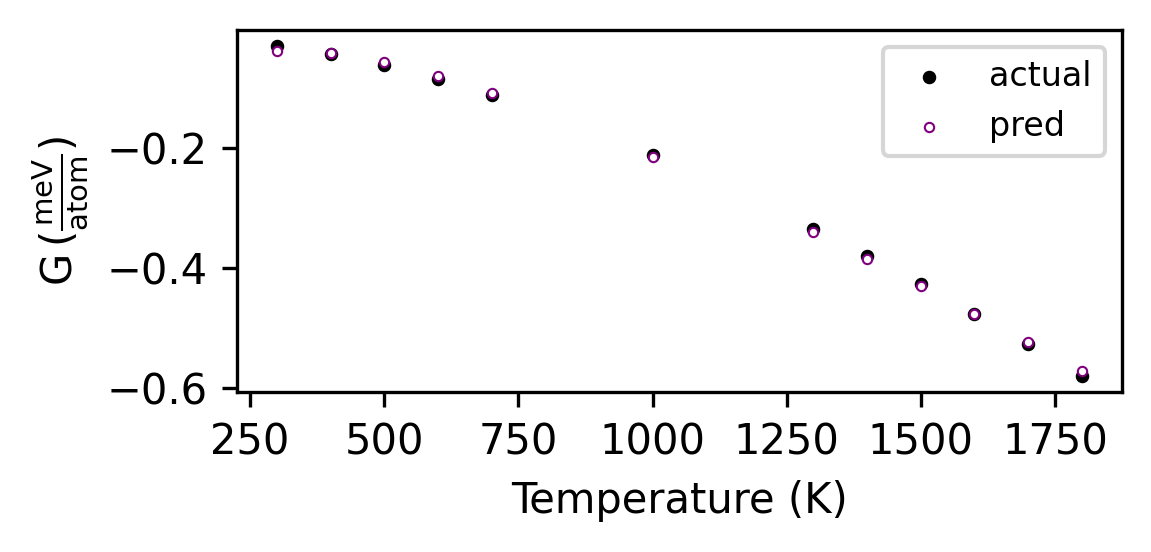

In [41]:
plot_results_vs_some_feature(X_train, y_train, y_pred_train, 1)

# **Group activity**:
Now load a new file from our data directory called `'Al_cmpds.csv'`. This has data not just for Al2O3, but for other Al-containing compounds.

**Guidelines**:
- print how many data points you have
- print how many compounds you have
- plot a histogram of temperatures in your dataset
- who can come up with the best model? you might consider manipulating the features
- we want our model to work for new Al-containing compounds in the future. does that inform how we might split training and testing?

**Note**:
- if you're curious, I came up w/ a decent solution for a very similar problem during my PhD -- **[Physical descriptor for the Gibbs energy of inorganic crystalline solids and temperature-dependent materials chemistry](https://www.nature.com/articles/s41467-018-06682-4)**

In [42]:
df = pd.read_csv(os.path.join('..', 'data', 'Al_cmpds.csv'))
df.head()

,cmpd,G,H,S,T
0,Al2O3,-0.031604,0.000304,0.000106,300
1,Al2O3,-0.044908,0.018626,0.000159,400
2,Al2O3,-0.063176,0.039604,0.000206,500
3,Al2O3,-0.085837,0.062258,0.000247,600
4,Al2O3,-0.112388,0.086058,0.000283,700
